In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('dataset_full.csv')

In [89]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [90]:
df['asn_ip']

0         60781
1         36024
2          4766
3         20454
4         53831
          ...  
88642      8560
88643     26496
88644    394695
88645     47583
88646     47846
Name: asn_ip, Length: 88647, dtype: int64

<AxesSubplot:ylabel='phishing'>

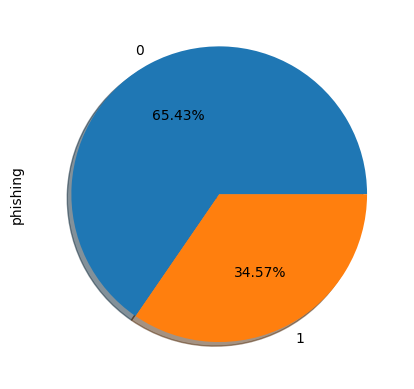

In [91]:
df['phishing'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

In [92]:
# seperating independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,1]

In [93]:
x

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,1,2,0,292,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,306,1,2,1,3597,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,334,1,3,1,3597,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,431,1,2,2,591,0,2,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,712,1,2,5,14391,1,0,0,0,0
88645,2,0,0,1,0,0,0,0,0,0,...,-1,1,1,1,52,1,0,0,0,0


In [94]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88642    1
88643    0
88644    1
88645    0
88646    0
Name: qty_hyphen_url, Length: 88647, dtype: int64

In [95]:
# checking null values
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [96]:
# feature selection
from sklearn.feature_selection import VarianceThreshold

In [97]:
varth=VarianceThreshold(threshold=0)
varth.fit(df)

VarianceThreshold(threshold=0)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=15)

In [100]:
varth.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [101]:
x_train

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
56139,1,0,0,3,0,0,0,0,0,0,...,202,1,2,1,8321,0,0,0,0,0
63699,2,1,0,0,0,0,0,0,0,0,...,132,1,2,1,43200,1,1,0,0,0
75541,2,0,0,0,0,0,0,0,0,0,...,197,1,2,1,21598,0,0,0,0,0
54458,2,0,0,0,0,0,0,0,0,0,...,310,1,2,5,118,1,0,0,0,0
73952,3,0,0,0,0,0,0,0,0,0,...,-1,1,2,1,3598,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49015,2,0,0,3,0,0,0,0,0,0,...,-1,1,4,5,285,1,0,0,0,0
68229,2,0,0,0,0,0,0,0,0,0,...,331,2,2,1,298,1,0,0,0,0
8076,2,0,0,0,0,0,0,0,0,0,...,307,1,2,7,592,0,0,0,0,0
52981,2,1,0,0,0,0,0,0,0,0,...,1292,1,2,2,10798,0,0,0,0,0


In [102]:
y_train

56139    0
63699    1
75541    0
54458    0
73952    0
        ..
49015    0
68229    0
8076     0
52981    1
7624     0
Name: qty_hyphen_url, Length: 35458, dtype: int64

In [103]:
cl=[column for column in df.columns
    if column  not in df.columns[varth.get_support()]]

In [104]:
print(len(cl))

13


In [105]:
print(cl)

['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain']


In [106]:
df.drop(cl,axis=True)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [107]:
x_train.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
qty_dot_url,1.000000,0.109481,0.128501,0.247274,0.417530,0.509017,0.229559,0.572111,0.006252,0.011688,...,-0.076674,-0.051982,-0.018063,-0.050582,0.020566,-0.064640,-0.048641,-0.002881,-0.003646,-0.061235
qty_hyphen_url,0.109481,1.000000,0.219779,0.298626,0.058282,0.163173,0.055891,0.116777,0.001512,0.011164,...,-0.026521,0.019783,0.038468,-0.029283,-0.032319,0.002194,0.001156,-0.002660,0.000519,-0.003804
qty_underline_url,0.128501,0.219779,1.000000,0.249122,0.090825,0.339708,0.107148,0.260938,0.025794,-0.002153,...,-0.045078,0.006601,0.019641,-0.006010,-0.027669,0.007159,-0.015274,-0.004510,0.003020,-0.012886
qty_slash_url,0.247274,0.298626,0.249122,1.000000,0.182811,0.290432,0.139360,0.209176,0.018776,0.014768,...,-0.095255,-0.048735,-0.032082,-0.042383,-0.021020,-0.020638,-0.041276,-0.005653,0.010991,-0.001566
qty_questionmark_url,0.417530,0.058282,0.090825,0.182811,1.000000,0.475930,0.209927,0.487219,0.007401,-0.001027,...,-0.020659,-0.026010,-0.008315,-0.034604,-0.003204,-0.043577,-0.025159,0.014766,0.014448,0.014257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tls_ssl_certificate,-0.064640,0.002194,0.007159,-0.020638,-0.043577,-0.029752,-0.000179,-0.032594,0.013435,0.005441,...,0.087638,0.265728,0.043512,0.169465,-0.037355,1.000000,0.307872,0.032582,0.029655,0.039571
qty_redirects,-0.048641,0.001156,-0.015274,-0.041276,-0.025159,-0.044116,-0.019380,-0.032324,0.004556,-0.009024,...,0.082911,0.279345,0.046590,0.132442,0.008191,0.307872,1.000000,0.042616,0.042785,0.047489
url_google_index,-0.002881,-0.002660,-0.004510,-0.005653,0.014766,0.000192,-0.002720,-0.000019,-0.000811,-0.000330,...,0.022808,0.049326,0.052519,0.023041,0.002281,0.032582,0.042616,1.000000,0.620542,-0.001975
domain_google_index,-0.003646,0.000519,0.003020,0.010991,0.014448,0.005829,-0.002716,0.003354,-0.000810,-0.000330,...,0.017171,0.040557,0.048083,0.024295,0.004864,0.029655,0.042785,0.620542,1.000000,-0.001973


In [108]:
plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<AxesSubplot:>

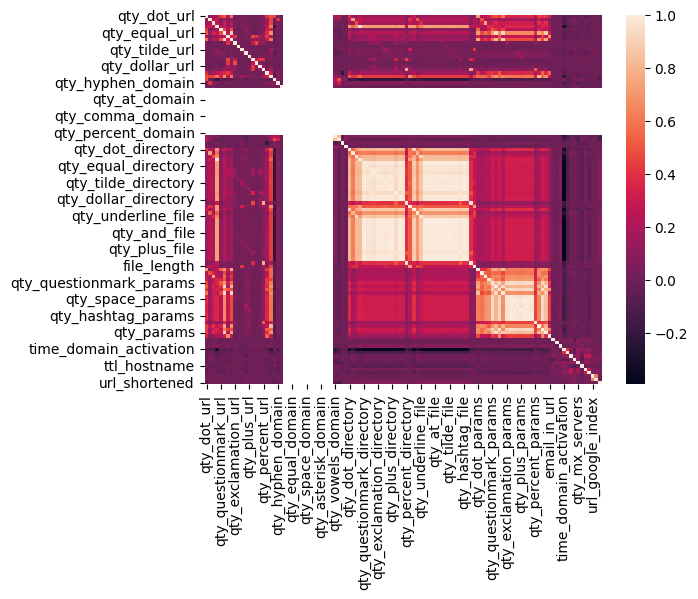

In [109]:
sns.heatmap(x_train.corr())

In [110]:

def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [111]:

corr=correlation(x_train,0.6)
len(corr)

58

In [112]:
x_train=x_train.drop(corr,axis=True)
x_test=x_test.drop(corr,axis=True)

In [113]:
x_train.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,url_shortened
56139,1,0,0,3,0,0,0,0,0,0,...,3814,202,1,2,1,8321,0,0,0,0
63699,2,1,0,0,0,0,0,0,0,0,...,7172,132,1,2,1,43200,1,1,0,0
75541,2,0,0,0,0,0,0,0,0,0,...,6376,197,1,2,1,21598,0,0,0,0
54458,2,0,0,0,0,0,0,0,0,0,...,5533,310,1,2,5,118,1,0,0,0
73952,3,0,0,0,0,0,0,0,0,0,...,-1,-1,1,2,1,3598,0,0,0,0


In [114]:
print(x_train.columns)

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'qty_dot_domain',
       'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain',
       'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain',
       'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain',
       'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain',
       'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain',
       'qty_percent_domain', 'qty_vowels_domain', 'domain_in_ip',
       'server_client_domain', 'qty_hyphen_params', 'qty_slash_params',
       'qty_percent_params', 'time_response', 'domain_spf', 'asn_ip',
       'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved',
 

In [115]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)


In [116]:
from sklearn.feature_selection import SelectKBest
sel_cols=SelectKBest(mutual_info_classif,k=10)
sel_cols.fit(x_train,y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x000001C8F6487598>)

In [117]:
x_train.columns[sel_cols.get_support()]

Index(['qty_hyphen_url', 'qty_slash_url', 'qty_tld_url', 'qty_hyphen_domain',
       'qty_hyphen_params', 'qty_slash_params', 'qty_percent_params', 'asn_ip',
       'time_domain_activation', 'time_domain_expiration'],
      dtype='object')

In [118]:
x_train.drop(['qty_hyphen_domain'],axis=1)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,url_shortened
56139,1,0,0,3,0,0,0,0,0,0,...,3814,202,1,2,1,8321,0,0,0,0
63699,2,1,0,0,0,0,0,0,0,0,...,7172,132,1,2,1,43200,1,1,0,0
75541,2,0,0,0,0,0,0,0,0,0,...,6376,197,1,2,1,21598,0,0,0,0
54458,2,0,0,0,0,0,0,0,0,0,...,5533,310,1,2,5,118,1,0,0,0
73952,3,0,0,0,0,0,0,0,0,0,...,-1,-1,1,2,1,3598,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49015,2,0,0,3,0,0,0,0,0,0,...,-1,-1,1,4,5,285,1,0,0,0
68229,2,0,0,0,0,0,0,0,0,0,...,6985,331,2,2,1,298,1,0,0,0
8076,2,0,0,0,0,0,0,0,0,0,...,3709,307,1,2,7,592,0,0,0,0
52981,2,1,0,0,0,0,0,0,0,0,...,6012,1292,1,2,2,10798,0,0,0,0


In [119]:
li=[col for col in x_train
    if col not in x_train.columns[sel_cols.get_support()]]

In [120]:
x_train=x_train.drop(li,axis=True)
x_test=x_test.drop(li,axis=True)

In [121]:
x_train.shape

(35458, 10)

In [122]:
y_train.shape

(35458,)

In [123]:
x_train

,qty_hyphen_url,qty_slash_url,qty_tld_url,qty_hyphen_domain,qty_hyphen_params,qty_slash_params,qty_percent_params,asn_ip,time_domain_activation,time_domain_expiration
56139,0,3,1,0,-1,-1,-1,20013,3814,202
63699,1,0,1,1,-1,-1,-1,31815,7172,132
75541,0,0,1,0,-1,-1,-1,31815,6376,197
54458,0,0,1,0,-1,-1,-1,16509,5533,310
73952,0,0,1,0,-1,-1,-1,14618,-1,-1
...,...,...,...,...,...,...,...,...,...,...
49015,0,3,1,0,-1,-1,-1,15169,-1,-1
68229,0,0,1,0,-1,-1,-1,13335,6985,331
8076,0,0,1,0,-1,-1,-1,26496,3709,307
52981,1,0,1,1,-1,-1,-1,21260,6012,1292


In [ ]:
# so finally we have 10 features in x_train , but i think qty_hyphen_domain may not effective,so just removing that feature

In [150]:
x_train=x_train.drop(['qty_hyphen_domain'],axis=True)
x_test=x_test.drop(['qty_hyphen_domain'],axis=True)

In [151]:
x_train

,qty_hyphen_url,qty_slash_url,qty_tld_url,qty_hyphen_params,qty_slash_params,qty_percent_params,asn_ip,time_domain_activation,time_domain_expiration
56139,0,3,1,-1,-1,-1,20013,3814,202
63699,1,0,1,-1,-1,-1,31815,7172,132
75541,0,0,1,-1,-1,-1,31815,6376,197
54458,0,0,1,-1,-1,-1,16509,5533,310
73952,0,0,1,-1,-1,-1,14618,-1,-1
...,...,...,...,...,...,...,...,...,...
49015,0,3,1,-1,-1,-1,15169,-1,-1
68229,0,0,1,-1,-1,-1,13335,6985,331
8076,0,0,1,-1,-1,-1,26496,3709,307
52981,1,0,1,-1,-1,-1,21260,6012,1292


In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfc=RandomForestClassifier()

In [154]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [155]:
rfc.predict(x_train)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [156]:
y_pred=rfc.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [159]:
accuracy_score(y_test,y_pred)

0.9959578108255467

In [160]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [161]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=30,cv=3,verbose=2,
                               random_state=10,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\projects\phishing-domain-detection\phishing-domain-detection\venv\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=10, verbose=2)

In [162]:
rf_randomcv.best_params_

{'n_estimators': 140,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'entropy'}

In [163]:
rf_randomcv


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=10, verbose=2)

In [164]:
best_random_grid=rf_randomcv.best_estimator_


In [165]:
y_pred=best_random_grid.predict(x_test)


In [166]:
accuracy_score(y_test,y_pred)

0.9963714301829326

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [169]:
y_pred=dtc.predict(x_test)

In [170]:
accuracy_score(y_test,y_pred)

0.9998683938408317

In [171]:
from sklearn.svm import SVC

In [172]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [173]:
y_pred=svc.predict(x_test)

In [174]:
accuracy_score(y_test,y_pred)

0.824362180150031

In [ ]:
# from above models decession tree classifier has best accuraccy

In [177]:

import pickle
pickle.dump(dtc,open('classifier.pkl','wb'))




In [176]:
x_train

,qty_hyphen_url,qty_slash_url,qty_tld_url,qty_hyphen_params,qty_slash_params,qty_percent_params,asn_ip,time_domain_activation,time_domain_expiration
56139,0,3,1,-1,-1,-1,20013,3814,202
63699,1,0,1,-1,-1,-1,31815,7172,132
75541,0,0,1,-1,-1,-1,31815,6376,197
54458,0,0,1,-1,-1,-1,16509,5533,310
73952,0,0,1,-1,-1,-1,14618,-1,-1
...,...,...,...,...,...,...,...,...,...
49015,0,3,1,-1,-1,-1,15169,-1,-1
68229,0,0,1,-1,-1,-1,13335,6985,331
8076,0,0,1,-1,-1,-1,26496,3709,307
52981,1,0,1,-1,-1,-1,21260,6012,1292
